In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold

import scipy.stats as stats
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.cross_validation import cross_val_score

In [56]:
#read in pickle of merged data
df = pd.read_pickle('df_house.pickle')

In [57]:
#drop string columns
df = df.drop(['district', 'statedist'], axis = 1)
#avoid dummy variable trap with years and states
df = df.drop(['year_y_2014','state_AK'], axis = 1)

In [58]:
#get series of dependent variable
y = df.district_votes.copy()

In [59]:
#get dataframe of covariates
X = df.drop('district_votes', axis =1).copy()

# Split data into test and train

In [93]:
#Split data into train and test sections
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

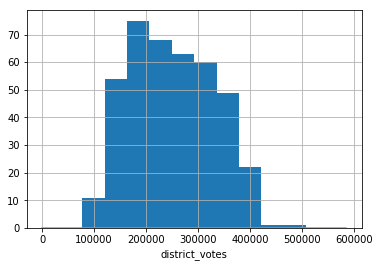

In [105]:
#Check dependent variable distribution
y_train.hist();

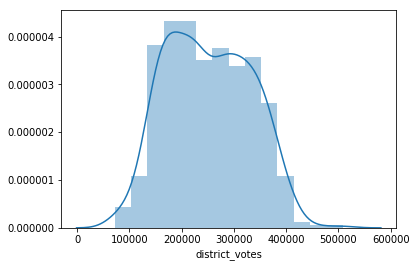

In [145]:
sns.distplot(df.district_votes, label = 'voter turnout');
sns.distplot(df.district_votes, label = 'voter turnout');

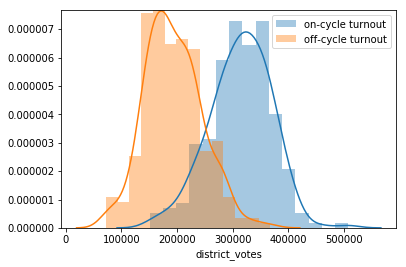

In [113]:
sns.distplot(df[df.year_y_2016 == 1].district_votes, label = 'on-cycle turnout');
sns.distplot(df[df.year_y_2016 != 1].district_votes, label = 'off-cycle turnout');
plt.legend();

In [95]:
#Check correlations between X and y
df.corr()

,district_votes,candidates,receipts,disbursements,end_dollars,state_AL,state_AR,state_AZ,state_CA,state_CO,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,year_y_2016
district_votes,1.000000,0.084059,0.148139,0.139163,0.048675,-0.082284,-0.021941,-0.085647,-0.096317,0.141612,...,-0.099552,-0.172805,-0.084204,0.064393,0.003700,0.018362,0.067191,-0.087003,-0.028537,0.751183
candidates,0.084059,1.000000,0.097659,0.106311,-0.038688,-0.167694,-0.027615,-0.090159,-0.104531,0.047292,...,0.123262,-0.049825,0.139936,-0.017474,0.071845,-0.136057,0.041179,-0.023868,0.071845,0.027886
receipts,0.148139,0.097659,1.000000,0.978986,0.136334,-0.035852,-0.033402,0.060672,0.005619,0.008004,...,-0.050516,-0.071849,0.006277,0.019166,-0.036120,-0.030987,0.241498,0.017699,-0.017781,-0.015247
disbursements,0.139163,0.106311,0.978986,1.000000,-0.068556,-0.037446,-0.038212,0.062902,0.006598,0.013764,...,-0.048475,-0.061303,0.008213,0.024158,-0.041952,-0.031409,0.164557,0.019049,-0.012977,-0.019455
end_dollars,0.048675,-0.038688,0.136334,-0.068556,1.000000,0.006513,0.022221,-0.008753,-0.004563,-0.027707,...,-0.011646,-0.053693,-0.009189,-0.023594,0.027097,0.000989,0.382043,-0.005953,-0.023944,0.019917
state_AL,-0.082284,-0.167694,-0.035852,-0.037446,0.006513,1.000000,-0.021423,-0.032463,-0.026345,-0.025197,...,-0.031516,-0.035173,-0.022746,-0.036886,-0.010648,-0.034290,-0.015088,-0.018516,-0.010648,0.007028
state_AR,-0.021941,-0.027615,-0.033402,-0.038212,0.022221,-0.021423,1.000000,-0.024392,-0.019794,-0.018932,...,-0.023680,-0.026427,-0.017090,-0.027715,-0.008000,-0.025764,-0.011336,-0.013912,-0.008000,0.005280
state_AZ,-0.085647,-0.090159,0.060672,0.062902,-0.008753,-0.032463,-0.024392,1.000000,-0.029994,-0.028688,...,-0.035883,-0.040046,-0.025897,-0.041996,-0.012123,-0.039041,-0.017178,-0.021081,-0.012123,0.008002
state_CA,-0.096317,-0.104531,0.005619,0.006598,-0.004563,-0.026345,-0.019794,-0.029994,1.000000,-0.023281,...,-0.029119,-0.032498,-0.021016,-0.034081,-0.009838,-0.031682,-0.013940,-0.017108,-0.009838,-0.071582
state_CO,0.141612,0.047292,0.008004,0.013764,-0.027707,-0.025197,-0.018932,-0.028688,-0.023281,1.000000,...,-0.027851,-0.031083,-0.020101,-0.032597,-0.009409,-0.030302,-0.013333,-0.016363,-0.009409,-0.034521


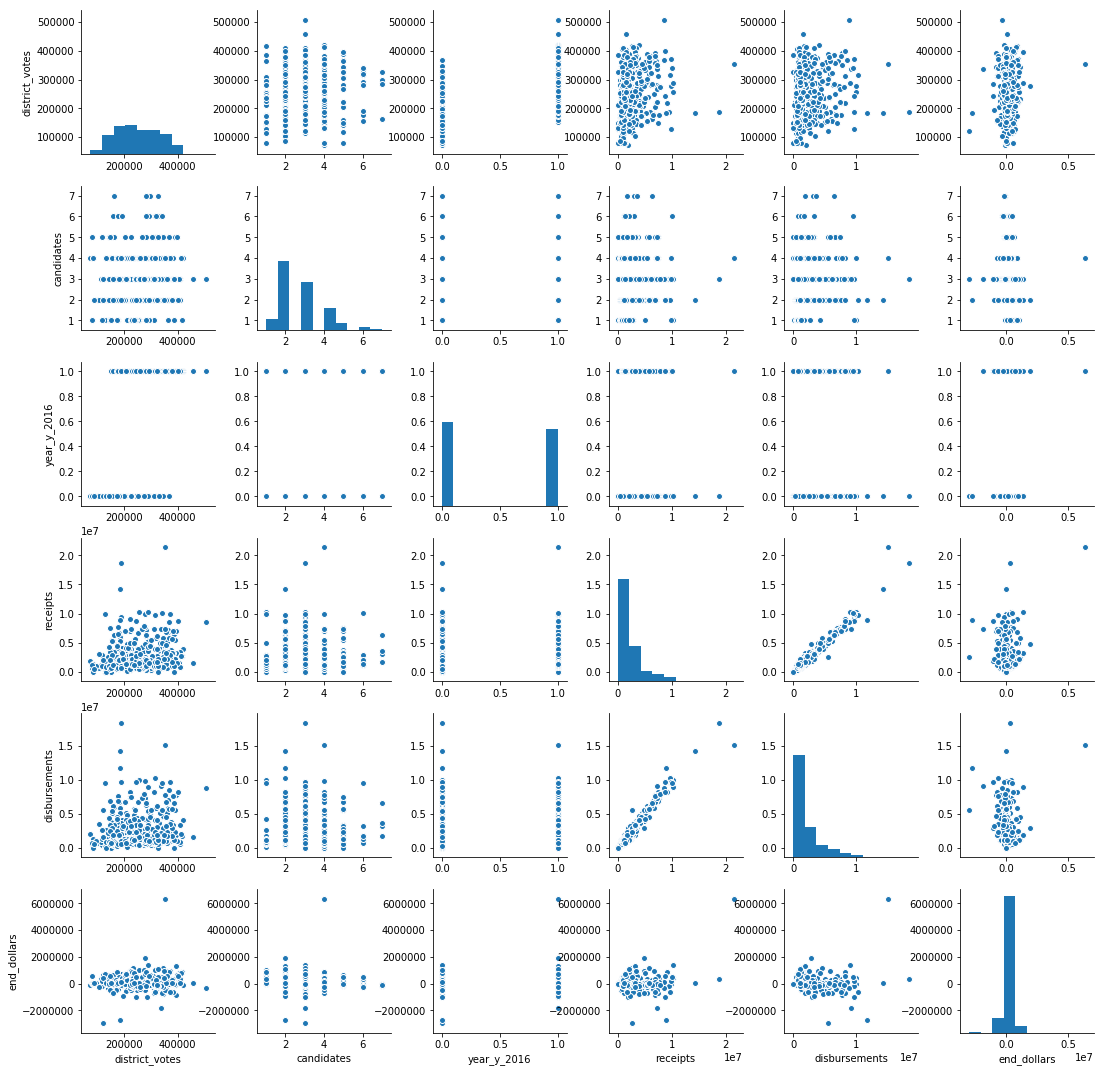

In [96]:
sns.pairplot(df[['district_votes','candidates', 'year_y_2016', 'receipts', 'disbursements', 'end_dollars']])

#### Strongest correlation is on-cycle year

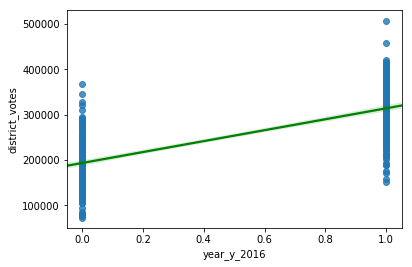

In [97]:
sns.regplot(x='year_y_2016', y='district_votes', data = df, line_kws={'color':'green'});


In [148]:
lr = LinearRegression(normalize = True)
lr.fit(X_train['year_y_2016'].to_frame(), y_train)
print(lr.score(X_train['year_y_2016'].to_frame(), y_train))
# Evaluate the model against the testing data
print(lr.score(X_test['year_y_2016'].to_frame(), y_test))
print(lr.coef_)
print(lr.intercept_)
y_pred_Naivelinear = lr.predict(X_test['year_y_2016'].to_frame())
y_resid_Naivelinear= y_test-y_pred_Naivelinear


0.54203454219
0.658641242549
[ 119051.22490976]
193832.578199


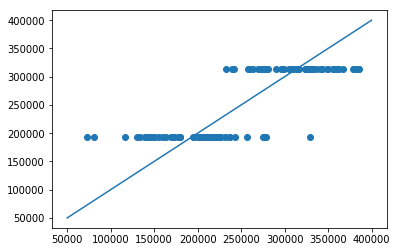

In [153]:
list = []
for i in range (50000, 400000):
    list.append(i)
comparison = pd.DataFrame(list)
    
plt.scatter(y_test, y_pred_Naivelinear)
plt.plot(comparison, comparison)

Train R2 = 0.852135171551
Test R2 = 0.814148558421
[('end_dollars', 2121321177136.5505), ('receipts', 2121321177136.5464), ('disbursements', 2121321177136.5454), ('state_RI', 122243.29453242573), ('state_MT', 121947.21783391709), ('year_y_2016', 115864.15226740525), ('state_NV', 110882.93319691689), ('state_TX', 110472.47036347588), ('state_WV', 109441.69310859645), ('state_WY', 101622.68152826426)]

[('receipts', 2121321177136.5464), ('state_MT', 121947.21783391709), ('year_y_2016', 115864.15226740525), ('state_ME', 46309.826862125141), ('state_CO', 42065.457206961531), ('state_IA', 25963.785414066817), ('state_OR', 24854.40283966716), ('state_DE', 21776.288898913775), ('state_MA', 15604.876154020338), ('state_SD', 8202.1574744534228), ('candidates', 7342.0873927378952), ('state_MN', 2785.4432703708458), ('state_FL', -731.35468602291644), ('state_NC', -7045.8157795957059), ('state_ND', -7258.7629663045909), ('state_KY', -10950.824676654604), ('state_NH', -15428.765329335278), ('state_

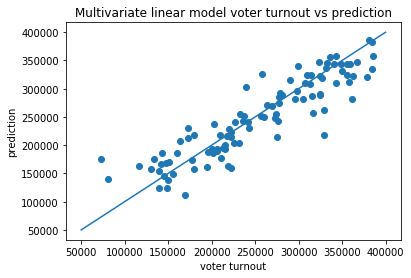

In [159]:
lr.fit(X_train, y_train)
print('Train R2 = '+str(lr.score(X_train, y_train)))
print('Test R2 = '+str(lr.score(X_test, y_test)))
y_pred_Linear = lr.predict(X_test)

zipped=zip(X.columns,abs(lr.coef_))
features_abs=sorted(zipped,key = lambda t: t[1],reverse=True)
print(features_abs[:10])
print()
zipped=zip(X.columns,lr.coef_)
features=sorted(zipped,key = lambda t: t[1],reverse=True)
print(features)

plt.scatter(y_test, y_pred_Linear)
plt.plot(comparison, comparison)
plt.xlabel('voter turnout')
plt.ylabel('prediction')
plt.title('Multivariate linear model voter turnout vs prediction')
y_resid_Linear= y_test-y_pred_Linear


0.859624609546
0.81874930714
3.91105410431
[  8.32439108e+03   0.00000000e+00   3.15855879e-03  -1.39725184e-03
  -4.53381256e+04  -2.96774345e+04  -4.81027655e+04  -2.95175983e+04
   7.37481195e+04  -7.16906874e+02   4.69102797e+04   3.03119757e+04
  -7.54759275e+04  -6.27589701e+04   5.84603470e+04   1.13125713e+04
  -4.18882816e+04  -4.85894978e+04  -4.58926737e+03   1.84376039e+04
  -8.88923066e+03   5.15865432e+04   0.00000000e+00   7.91905843e+04
   3.87483609e+03   3.47884033e+04   5.73216208e+02  -4.74153302e+04
   1.47728595e+05   2.84212469e+04   2.53891070e+04  -4.42395859e+04
   1.67382448e+04  -5.90659212e+04  -4.41598292e+04  -7.50985982e+04
  -4.87219760e+04  -1.51440220e+04  -5.26202686e+04   5.63336268e+04
  -9.93322906e+03  -8.78428932e+04  -4.60752111e+04   4.49070460e+04
  -5.50686632e+04  -7.61405892e+04  -6.25178179e+04   8.41468183e+03
  -1.45322821e+04  -1.63392481e+03   2.20209753e+04  -7.77526079e+04
  -5.94935157e+04   1.17056736e+05]
[('state_MT', 147728.594

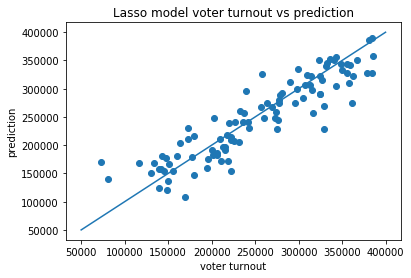

In [160]:
m = LassoCV(normalize=True)
m.fit(X_train,y_train)
print(m.score(X_train,y_train))
print(m.score(X_test,y_test))
print(m.alpha_)
print(m.coef_)
Lasso_betas = m.coef_
y_pred_Lasso = m.predict(X_test)

zipped=zip(X.columns,abs(m.coef_))
features_abs=sorted(zipped,key = lambda t: t[1],reverse=True)
print(features_abs[:10])
print()
zipped=zip(X.columns,m.coef_)
features=sorted(zipped,key = lambda t: t[1],reverse=True)
print(features)

plt.scatter(y_test, y_pred_Lasso)
plt.plot(comparison, comparison)
plt.xlabel('voter turnout')
plt.ylabel('prediction')
plt.title('Lasso model voter turnout vs prediction')
y_resid_Lasso= y_test-y_pred_Lasso

0.852126020405
0.805961432319
0.1
[  6.98047125e+03   1.58181350e-03   1.67152881e-03  -1.26419424e-03
  -3.34208807e+04  -1.61327825e+04  -3.42643869e+04  -1.99468113e+04
   7.74229769e+04   1.06836829e+04   5.58657565e+04   3.91231210e+04
  -6.03668771e+04  -4.82217660e+04   6.31840517e+04   1.94641249e+04
  -2.76618762e+04  -3.53006297e+04   5.22310931e+03   2.32197962e+04
   2.06707737e+03   5.78760137e+04   6.03382357e+03   8.28344334e+04
   1.85419371e+04   4.22206838e+04   1.23728501e+04  -3.06840091e+04
   1.45906422e+05   3.47745228e+04   3.47523646e+04  -3.03245836e+04
   2.87766189e+04  -4.19595145e+04  -3.25321569e+04  -5.61469329e+04
  -3.44320528e+04  -8.52858379e+03  -3.97000036e+04   6.40877309e+04
  -2.36069414e+02  -6.89075010e+04  -3.38083084e+04   5.78496254e+04
  -3.89246403e+04  -6.07289984e+04  -4.50096154e+04   1.93410375e+04
  -2.51947261e+03   7.16940239e+03   2.56919392e+04  -6.21098960e+04
  -4.28956120e+04   1.05933768e+05]
[('state_MT', 145906.4223638945),

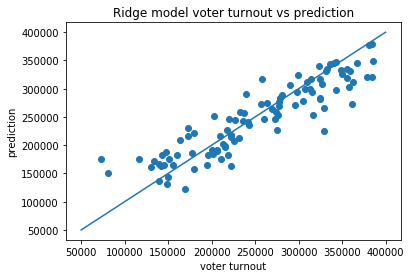

In [161]:
m1 = RidgeCV(normalize=True)
m1.fit(X_train,y_train)
print(m1.score(X_train,y_train))
print(m1.score(X_test,y_test))
print(m1.alpha_)
print(m1.coef_)
Ridge_betas = m1.coef_
y_pred_Ridge = m1.predict(X_test)

zipped=zip(X.columns,abs(m1.coef_))
features_abs=sorted(zipped,key = lambda t: t[1],reverse=True)
print(features_abs[:10])
print()
zipped=zip(X.columns,m1.coef_)
features=sorted(zipped,key = lambda t: t[1],reverse=True)
print(features)

plt.scatter(y_test, y_pred_Ridge)
plt.plot(comparison, comparison)
plt.xlabel('voter turnout')
plt.ylabel('prediction')
plt.title('Ridge model voter turnout vs prediction')
y_resid_Ridge= y_test-y_pred_Ridge

Text(0.5,1,'Linear model residuals')

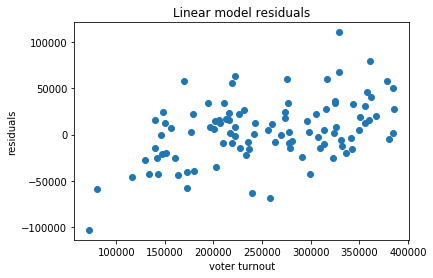

In [163]:
plt.scatter(y_test, y_resid_Linear)
plt.xlabel('voter turnout')
plt.ylabel('residuals')
plt.title('Linear model residuals')

Text(0.5,1,'Lasso model residuals')

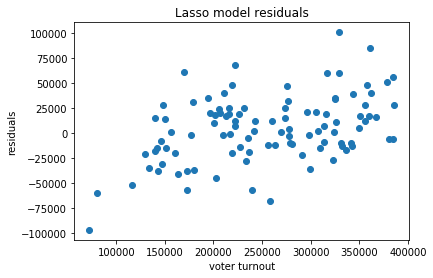

In [164]:
plt.scatter(y_test, y_resid_Lasso)
plt.xlabel('voter turnout')
plt.ylabel('residuals')
plt.title('Lasso model residuals')

Text(0.5,1,'Ridge model residuals')

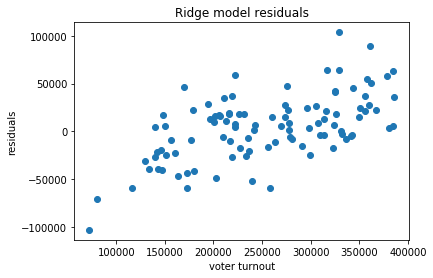

In [165]:
plt.scatter(y_test, y_resid_Ridge)
plt.xlabel('voter turnout')
plt.ylabel('residuals')
plt.title('Ridge model residuals')

Text(0.5,1,'Bivariate model residuals')

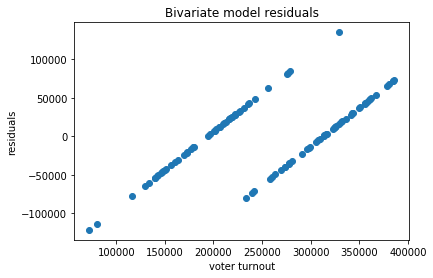

In [166]:
plt.scatter(y_test, y_resid_Naivelinear)
plt.xlabel('voter turnout')
plt.ylabel('residuals')
plt.title('Bivariate model residuals')